In [2]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
import re
from scipy.sparse import hstack
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import pickle
from tqdm import tqdm
import os
from collections import Counter


In [3]:
data = pd.read_csv("preprocessed_data.csv", nrows=50000)
data.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,project_title
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,educational support english learners home


In [4]:
y = data["project_is_approved"].values
x = data.drop(["project_is_approved"], axis=1)

x.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,project_title
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,educational support english learners home


# Splitting train, CV and test

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size=0.33, stratify=y_train)

print(x_train.shape)
print(x_cv.shape)
print(x_test.shape)

(22445, 9)
(11055, 9)
(16500, 9)


# Vectorizing price

In [6]:
# Vectorizing price

normalizer_price = Normalizer()
normalizer_price.fit(x_train['price'].values.reshape(-1, 1))

x_train_price_norm = normalizer_price.transform(x_train['price'].values.reshape(-1, 1))
x_cv_price_norm = normalizer_price.transform(x_cv['price'].values.reshape(-1, 1))
x_test_price_norm = normalizer_price.transform(x_test['price'].values.reshape(-1, 1))

print(x_train_price_norm.shape)
print(x_cv_price_norm.shape)
print(x_test_price_norm.shape)

(22445, 1)
(11055, 1)
(16500, 1)


# Vectorizing teacher_number_of_previously_posted_projects

In [7]:
# Vectorizing teacher_number_of_previously_posted_projects


normalizer_teacher_number_of_previously_posted_projects = Normalizer()

normalizer_teacher_number_of_previously_posted_projects.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

x_train_pre_posted_norm = normalizer_teacher_number_of_previously_posted_projects.transform(
    x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
x_cv_pre_posted_norm = normalizer_teacher_number_of_previously_posted_projects.transform(x_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
x_test_pre_posted_norm = normalizer_teacher_number_of_previously_posted_projects.transform(
    x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

print(x_train_pre_posted_norm.shape)
print(x_cv_pre_posted_norm.shape)
print(x_test_pre_posted_norm.shape)

(22445, 1)
(11055, 1)
(16500, 1)


# Vectorizing essay (BOW, TF_IDF)

Essay

In [8]:
# https://www.kaggle.com/nafisur/sentiment-analysis-for-beginner

# Vectorizing essay (BOW, TF_IDF)

countVectorizer_essay = CountVectorizer(min_df=10, max_features=5000)
tfidfVectorizer_essay = TfidfVectorizer(min_df=10, max_features=5000)

countVectorizer_essay.fit(x_train['essay'].values)
tfidfVectorizer_essay.fit(x_train['essay'].values)

x_train_essay_bow = countVectorizer_essay.transform(x_train['essay'].values)
x_cv_essay_bow = countVectorizer_essay.transform(x_cv['essay'].values)
x_test_essay_bow = countVectorizer_essay.transform(x_test['essay'].values)

x_train_essay_tfidf = tfidfVectorizer_essay.transform(x_train['essay'].values)
x_cv_essay_tfidf = tfidfVectorizer_essay.transform(x_cv['essay'].values)
x_test_essay_tfidf = tfidfVectorizer_essay.transform(x_test['essay'].values)

print(x_train_essay_bow.shape)
print(x_cv_essay_bow.shape)
print(x_test_essay_bow.shape)

print("=" * 50)
print("TFIDF Encoded")

print(x_train_essay_tfidf.shape)
print(x_cv_essay_tfidf.shape)
print(x_test_essay_tfidf.shape)


(22445, 5000)
(11055, 5000)
(16500, 5000)
TFIDF Encoded
(22445, 5000)
(11055, 5000)
(16500, 5000)


# Vectorizing project_title ((BOW, TF_IDF))

Project Title

In [9]:
# Vectorizing project_title ((BOW, TF_IDF))

countVectorizer_project_title = CountVectorizer(min_df=10, max_features=5000)
tfidfVectorizer_project_title = TfidfVectorizer(min_df=10, max_features=5000)

countVectorizer_project_title.fit(x_train['project_title'].astype('U').values)
tfidfVectorizer_project_title.fit(x_train['project_title'].astype('U').values)

x_train_project_title_bow = countVectorizer_project_title.transform(x_train['project_title'].astype('U').values)
x_cv_project_title_bow = countVectorizer_project_title.transform(x_cv['project_title'].astype('U').values)
x_test_project_title_bow = countVectorizer_project_title.transform(x_test['project_title'].astype('U').values)

x_train_project_title_tfidf = tfidfVectorizer_project_title.transform(x_train['project_title'].astype('U').values)
x_cv_project_title_tfidf = tfidfVectorizer_project_title.transform(x_cv['project_title'].astype('U').values)
x_test_project_title_tfidf = tfidfVectorizer_project_title.transform(x_test['project_title'].astype('U').values)

print(x_train_project_title_bow.shape)
print(x_cv_project_title_bow.shape)
print(x_test_project_title_bow.shape)

print("=" * 50)
print("TFIDF Encoded")

print(x_train_project_title_tfidf.shape)
print(x_cv_project_title_tfidf.shape)
print(x_test_project_title_tfidf.shape)

(22445, 1153)
(11055, 1153)
(16500, 1153)
TFIDF Encoded
(22445, 1153)
(11055, 1153)
(16500, 1153)


# Vectorizing school_state

In [10]:
# Vectorizing school_state

countVectorizer_school_state = CountVectorizer()

countVectorizer_school_state.fit(x_train['school_state'].values)

x_train_school_state_ohe = countVectorizer_school_state.transform(x_train['school_state'].values)
x_cv_school_state_ohe = countVectorizer_school_state.transform(x_cv['school_state'].values)
x_test_school_state_ohe = countVectorizer_school_state.transform(x_test['school_state'].values)

print(x_train_school_state_ohe.shape, y_train.shape)
print(x_cv_school_state_ohe.shape, y_cv.shape)
print(x_test_school_state_ohe.shape, y_test.shape)

(22445, 51) (22445,)
(11055, 51) (11055,)
(16500, 51) (16500,)


In [11]:
# Vectorizing teacher_prefix

In [12]:
# Vectorizing teacher_prefix


countVectorizer_teacher_prefix = CountVectorizer()

countVectorizer_teacher_prefix.fit(x_train['teacher_prefix'].values)

x_train_teacher_prefix_ohe = countVectorizer_teacher_prefix.transform(x_train['teacher_prefix'].values)
x_cv_teacher_prefix_ohe = countVectorizer_teacher_prefix.transform(x_cv['teacher_prefix'].values)
x_test_teacher_prefix_ohe = countVectorizer_teacher_prefix.transform(x_test['teacher_prefix'].values)

print(x_train_teacher_prefix_ohe.shape)
print(x_cv_teacher_prefix_ohe.shape)
print(x_test_teacher_prefix_ohe.shape)

(22445, 5)
(11055, 5)
(16500, 5)


In [13]:
# Vectorizing project_grade_category

In [14]:
# Vectorizing project_grade_category

countVectorizer_project_grade_category = CountVectorizer()

countVectorizer_project_grade_category.fit(x_train['project_grade_category'].values)

x_train_project_grade_category_ohe = countVectorizer_project_grade_category.transform(x_train['project_grade_category'].values)
x_cv_project_grade_category_ohe = countVectorizer_project_grade_category.transform(x_cv['project_grade_category'].values)
x_test_project_grade_category_ohe = countVectorizer_project_grade_category.transform(x_test['project_grade_category'].values)

print(x_train_project_grade_category_ohe.shape)
print(x_cv_project_grade_category_ohe.shape)
print(x_test_project_grade_category_ohe.shape)


(22445, 4)
(11055, 4)
(16500, 4)


In [15]:
# Vectorizing clean_categories

In [16]:
# Vectorizing clean_categories

countVectorizer_clean_categories = CountVectorizer()

countVectorizer_clean_categories.fit(x_train['clean_categories'].values)

x_train_category_ohe = countVectorizer_clean_categories.transform(x_train['clean_categories'].values)
x_cv_category_ohe = countVectorizer_clean_categories.transform(x_cv['clean_categories'].values)
x_test_category_ohe = countVectorizer_clean_categories.transform(x_test['clean_categories'].values)

print(x_train_category_ohe.shape)
print(x_cv_category_ohe.shape)
print(x_test_category_ohe.shape)

(22445, 9)
(11055, 9)
(16500, 9)


In [17]:
# Vectorizing clean_subcategories

In [18]:
# Vectorizing clean_subcategories

countVectorizer_clean_subcategories = CountVectorizer()

countVectorizer_clean_subcategories.fit(x_train['clean_subcategories'].values)

x_train_clean_subcategories_ohe = countVectorizer_clean_subcategories.transform(x_train['clean_subcategories'].values)
x_cv_clean_subcategories_ohe = countVectorizer_clean_subcategories.transform(x_cv['clean_subcategories'].values)
x_test_clean_subcategories_ohe = countVectorizer_clean_subcategories.transform(x_test['clean_subcategories'].values)

print(x_train_clean_subcategories_ohe.shape)
print(x_cv_clean_subcategories_ohe.shape)
print(x_test_clean_subcategories_ohe.shape)

(22445, 30)
(11055, 30)
(16500, 30)


# Create Sparse matrix set 1 (title, essay with BOW representation)

In [19]:
# Concatinating all the features   (BOW Vectorization)

x_tr_set_1 = hstack((x_train_price_norm,
                     x_train_clean_subcategories_ohe,
                     x_train_category_ohe,
                     x_train_project_grade_category_ohe,
                     x_train_essay_bow,
                     x_train_teacher_prefix_ohe,
                     x_train_project_title_bow)).tocsr()

x_cv_set_1 = hstack((x_cv_price_norm,
                     x_cv_clean_subcategories_ohe,
                     x_cv_category_ohe,
                     x_cv_project_grade_category_ohe,
                     x_cv_essay_bow,
                     x_cv_teacher_prefix_ohe,
                     x_cv_project_title_bow)).tocsr()

x_te_set_1 = hstack((x_test_price_norm,
                     x_test_clean_subcategories_ohe,
                     x_test_category_ohe,
                     x_test_project_grade_category_ohe,
                     x_test_essay_bow,
                     x_test_teacher_prefix_ohe,
                     x_test_project_title_bow)).tocsr()

print(x_tr_set_1.shape)
print(x_cv_set_1.shape)
print(x_te_set_1.shape)

(22445, 6202)
(11055, 6202)
(16500, 6202)


# Create Sparse matrix set 2 (title, essay with TF-IDF representation)

In [20]:
# Concatinating all the features (TF_IDF vectorization)

x_tr_set_2 = hstack((x_train_price_norm,
                     x_train_clean_subcategories_ohe,
                     x_train_category_ohe,
                     x_train_project_grade_category_ohe,
                     x_train_essay_tfidf,
                     x_train_teacher_prefix_ohe,
                     x_train_project_title_tfidf)).tocsr()

x_cv_set_2 = hstack((x_cv_price_norm,
                     x_cv_clean_subcategories_ohe,
                     x_cv_category_ohe,
                     x_cv_project_grade_category_ohe,
                     x_cv_essay_tfidf,
                     x_cv_teacher_prefix_ohe,
                     x_cv_project_title_tfidf)).tocsr()

x_te_set_2 = hstack((x_test_price_norm,
                     x_test_clean_subcategories_ohe,
                     x_test_category_ohe,
                     x_test_project_grade_category_ohe,
                     x_test_essay_tfidf,
                     x_test_teacher_prefix_ohe,
                     x_test_project_title_tfidf)).tocsr()

print(x_tr_set_2.shape)
print(x_cv_set_2.shape)
print(x_te_set_2.shape)

(22445, 6202)
(11055, 6202)
(16500, 6202)


# Batch Predict

In [21]:
# Batch Predict

def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0] % 1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i + 1000])[:, 1])
    # we will be predicting for the last data points
    if data.shape[0] % 1000 != 0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:, 1])

    return y_data_pred

# Hyper Parameter tunning on set_1(BOW) , gridsearchCV

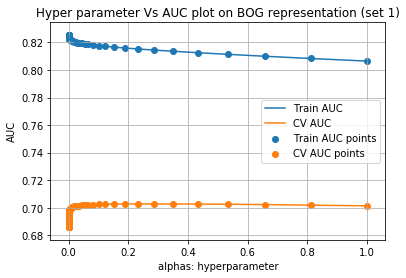

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.051913,0.003019,0.006188,0.001626,1,{'alpha': 1.0},0.689620,0.704801,0.708421,0.717427,...,0.804511,0.804775,0.807282,0.806769,0.803273,0.806603,0.808024,0.808780,0.806464,0.001651
1,0.051157,0.001457,0.005704,0.000453,0.811131,{'alpha': 0.8111308307896871},0.689999,0.705576,0.709125,0.718202,...,0.806446,0.806710,0.809141,0.808673,0.805137,0.808521,0.809865,0.810745,0.808370,0.001656
2,0.050562,0.000828,0.005468,0.000521,0.657933,{'alpha': 0.657933224657568},0.690317,0.706360,0.709562,0.718889,...,0.808069,0.808348,0.810707,0.810302,0.806727,0.810143,0.811448,0.812428,0.809988,0.001664
3,0.054224,0.004584,0.005579,0.000610,0.53367,{'alpha': 0.533669923120631},0.690439,0.706938,0.709859,0.719327,...,0.809471,0.809768,0.812061,0.811693,0.808083,0.811539,0.812780,0.813860,0.811374,0.001667
4,0.050887,0.001219,0.005696,0.000638,0.432876,{'alpha': 0.43287612810830584},0.690559,0.707174,0.710119,0.719643,...,0.810681,0.810996,0.813219,0.812885,0.809240,0.812719,0.813943,0.815093,0.812567,0.001672


In [23]:
# GridSearchCV on SET_1

# https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-3-cross-validation-and-hyperparameter-tuning/

from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

nb = MultinomialNB()
# alphas = [0.00001, 0.0001, 0.001 ,0.01, 0.1, 0.25, 0.5, 0.8, 1]
# p_grid_NB = {'alpha': alphas, 'fit_prior': [False]}
p_grid_NB = {'alpha': np.logspace(0,-9, num=100)}

gridSearchCv_1 = GridSearchCV(estimator=nb, param_grid=p_grid_NB, cv=10, scoring='roc_auc', return_train_score=True)
gridSearchCv_1.fit(x_tr_set_1, y_train)


results = pd.DataFrame.from_dict(gridSearchCv_1.cv_results_)

train_auc = results['mean_train_score']
train_auc_std = results['std_train_score']
cv_auc = results['mean_test_score']
cv_auc_std = results['std_test_score']


plt.plot(p_grid_NB["alpha"], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(p_grid_NB["alpha"], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(p_grid_NB["alpha"], train_auc, label='Train AUC points')
plt.scatter(p_grid_NB["alpha"], cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("alphas: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot on BOG representation (set 1)")
plt.grid()
plt.show()

results.head()



# Hyperparameter tunning in set_2 (TF-IDF) using GridsearchCV

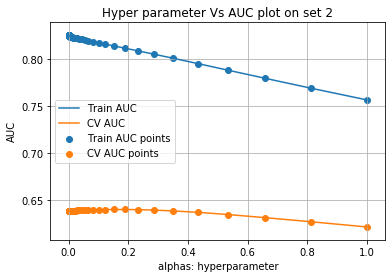

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.054457,0.003009,0.006066,0.001030,1,{'alpha': 1.0},0.601320,0.617418,0.633280,0.625531,...,0.754919,0.754150,0.759655,0.756160,0.754858,0.755781,0.756834,0.757885,0.756347,0.001639
1,0.054934,0.004201,0.006193,0.000756,0.811131,{'alpha': 0.8111308307896871},0.605790,0.624436,0.638946,0.631745,...,0.767585,0.766543,0.772117,0.768775,0.767232,0.768364,0.769320,0.770882,0.768910,0.001674
2,0.051608,0.001688,0.005697,0.000460,0.657933,{'alpha': 0.657933224657568},0.608985,0.629973,0.643439,0.636627,...,0.778226,0.776896,0.782474,0.779320,0.777590,0.778913,0.779773,0.781759,0.779424,0.001700
3,0.052406,0.002501,0.006200,0.001468,0.53367,{'alpha': 0.533669923120631},0.611892,0.634257,0.647100,0.641096,...,0.786943,0.785391,0.790937,0.788016,0.786115,0.787574,0.788359,0.790654,0.788052,0.001721
4,0.051954,0.002183,0.005601,0.000662,0.432876,{'alpha': 0.43287612810830584},0.613532,0.638121,0.649552,0.644418,...,0.794006,0.792266,0.797749,0.795075,0.793023,0.794596,0.795306,0.797839,0.795044,0.001732


In [25]:
# GridSearchCV on set2

# https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-3-cross-validation-and-hyperparameter-tuning/

from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

nb = MultinomialNB()

# alphas = [0.00001, 0.0001, 0.001 ,0.01, 0.1, 0.25, 0.5, 0.8, 1]
# p_grid_NB = {'alpha': alphas}
p_grid_NB = {'alpha': np.logspace(0,-9, num=100)}

gridSearchCv_2 = GridSearchCV(estimator=nb, param_grid=p_grid_NB, cv=10, scoring='roc_auc', return_train_score=True)
gridSearchCv_2.fit(x_tr_set_2, y_train)

results = pd.DataFrame.from_dict(gridSearchCv_2.cv_results_)

train_auc = results['mean_train_score']
train_auc_std = results['std_train_score']
cv_auc = results['mean_test_score']
cv_auc_std = results['std_test_score']

plt.plot(p_grid_NB["alpha"], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(p_grid_NB["alpha"], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(p_grid_NB["alpha"], train_auc, label='Train AUC points')
plt.scatter(p_grid_NB["alpha"], cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("alphas: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot on set 2")
plt.grid()
plt.show()

results.head()


# Testing alpha value on test data (set_1 BOW representation)

Best Param set 1 : {'alpha': 0.23101297000831597}
0.6922212472150477


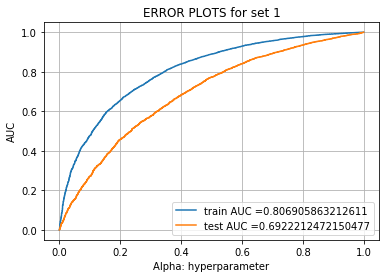

In [32]:
# For set_1 data - Naive bayes on test data

from sklearn.metrics import roc_auc_score, auc

best_alpha_set1 = gridSearchCv_1.best_params_["alpha"]

print("Best Param set 1 : {}".format(gridSearchCv_1.best_params_))

nb = MultinomialNB(alpha=best_alpha_set1)
nb.fit(x_tr_set_1, y_train)

y_train_pred_1 = batch_predict(nb, x_tr_set_1)
y_test_pred_1 = batch_predict(nb, x_te_set_1)


train_fpr_1, train_tpr_1, tr_thresholds_1 = roc_curve(y_train, y_train_pred_1)
test_fpr_1, test_tpr_1, te_thresholds_1 = roc_curve(y_test, y_test_pred_1)

auc_score_1 = auc(test_fpr_1, test_tpr_1)

print(auc_score_1)

plt.plot(train_fpr_1, train_tpr_1, label="train AUC =" + str(auc(train_fpr_1, train_tpr_1)))
plt.plot(test_fpr_1, test_tpr_1, label="test AUC =" + str(auc(test_fpr_1, test_tpr_1)))
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS for set 1")
plt.grid()
plt.show()

# Testing alpha value on test data (set_2 TF_IDFrepresentation)

Best param SET 2 : {'alpha': 0.1873817422860384}
0.6377664106653742


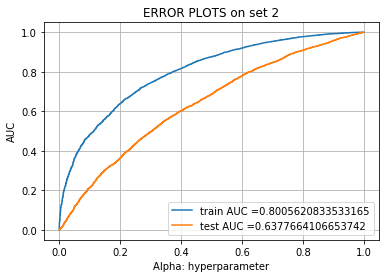

In [33]:
# For set_2 data - Naive bayes on test data

from sklearn.metrics import roc_auc_score, auc


print("Best param SET 2 : {}".format(gridSearchCv_2.best_params_))
best_alpha_set2 = gridSearchCv_2.best_params_["alpha"]

nb = MultinomialNB(alpha=best_alpha_set1)
nb.fit(x_tr_set_2, y_train)


y_train_pred_2 = batch_predict(nb, x_tr_set_2)
y_test_pred_2 = batch_predict(nb, x_te_set_2)

train_fpr_2, train_tpr_2, tr_thresholds_2 = roc_curve(y_train, y_train_pred_2)
test_fpr_2, test_tpr_2, te_thresholds_2 = roc_curve(y_test, y_test_pred_2)

auc_score_2 = auc(test_fpr_2, test_tpr_2)
print(auc_score_2)

plt.plot(train_fpr_2, train_tpr_2, label="train AUC =" + str(auc(train_fpr_2, train_tpr_2)))
plt.plot(test_fpr_2, test_tpr_2, label="test AUC =" + str(auc(test_fpr_2, test_tpr_2)))
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS on set 2")
plt.grid()
plt.show()


# Confusion matrix set_1

In [28]:
# Confusion matrix for set_1

# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):

    t = threshould[np.argmax(tpr * (1 - fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr * (1 - fpr)), "for threshold", np.round(t, 3))
    return t


def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i >= threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


from sklearn.metrics import confusion_matrix

best_t = find_best_threshold(tr_thresholds_1, train_fpr_1, train_tpr_1)

print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred_1, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred_1, best_t)))


the maximum value of tpr*(1-fpr) 0.5353876995384836 for threshold 0.86
Train confusion matrix
[[ 2713   882]
 [ 5477 13373]]
Test confusion matrix
[[1564 1078]
 [4305 9553]]


# Confusion matrix set_2

In [29]:
# Confusion matrix for  set_2

# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):

    t = threshould[np.argmax(tpr * (1 - fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr * (1 - fpr)), "for threshold", np.round(t, 3))
    return t


def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i >= threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


from sklearn.metrics import confusion_matrix

best_t = find_best_threshold(tr_thresholds_2, train_fpr_2, train_tpr_2)

print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred_2, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred_2, best_t)))


the maximum value of tpr*(1-fpr) 0.5260657485529194 for threshold 0.84
Train confusion matrix
[[ 2629   966]
 [ 5290 13560]]
Test confusion matrix
[[1330 1312]
 [4388 9470]]


# Get top features of set_1

In [30]:
# Get top features of set_1


nb_bow = MultinomialNB(alpha=best_alpha_set1, class_prior=[0.5, 0.5], fit_prior=True)
nb_bow.fit(x_tr_set_1, y_train)


feature_names_set_1 = []

for word in countVectorizer_clean_subcategories.get_feature_names():
    feature_names_set_1.append(word)

for word in countVectorizer_clean_categories.get_feature_names():
    feature_names_set_1.append(word)

for word in countVectorizer_project_grade_category.get_feature_names():
    feature_names_set_1.append(word)

for word in countVectorizer_essay.get_feature_names():
    feature_names_set_1.append(word)

for word in countVectorizer_teacher_prefix.get_feature_names():
        feature_names_set_1.append(word)

for word in countVectorizer_project_title.get_feature_names():
    feature_names_set_1.append(word)


# https://www.geeksforgeeks.org/python-reverse-a-numpy-array/
pos_class_prob_sorted = nb_bow.feature_log_prob_[1].argsort()[::-1]

# https://stackoverflow.com/questions/50526898/how-to-get-feature-importance-in-naive-bayes
print(np.take(feature_names_set_1, pos_class_prob_sorted[:20]))


['studied' 'schoolers' 'myriad' 'classrooms' 'learns' 'theater' 'notch'
 'thier' 'learned' 'helped' 'appliedsciences' 'map' 'narrative' 'readings'
 'workbooks' 'weaknesses' 'needed' 'used' 'days' 'about']


# Representing result of vectorizer, model, Hyper parameter, AUC

In [31]:
# Representing result of vectorizer, model, Hyper parameter, AUC

# https://stackoverflow.com/questions/36423259/how-to-use-pretty-table-in-python-to-print-out-data-from-multiple-lists

import prettytable

x = prettytable.PrettyTable(["vectorizer", "model", "Hyper parameter", "AUC"])
x.add_row(["BOW","NB",best_alpha_set1,round(auc_score_1, 4)])
x.add_row(["TF_IDF", "NB", best_alpha_set2, round(auc_score_2,4)])

print(x)

+------------+-------+---------------------+--------+
| vectorizer | model |   Hyper parameter   |  AUC   |
+------------+-------+---------------------+--------+
|    BOW     |   NB  | 0.23101297000831597 | 0.6922 |
|   TF_IDF   |   NB  |  0.1873817422860384 | 0.6378 |
+------------+-------+---------------------+--------+
